**Author : Barkha Verma**

>**Data Science and Business Analytics internship**

> **The Sparks Foundation GRIP**

> **Batch : December 2020**

> **Task 1**












**Simple Linear Regression**

> In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

> **Dataset**

> Dataset is consist of only two variables:

1.   Hours they study
2.   Scores they achieved

















In [71]:
# First we will import the important libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

In [72]:
# We will read dataset from the remote link
dataset = "http://bit.ly/w-data"
data = pd.read_csv(dataset)

In [73]:
# We will print the first five line of dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [74]:
# we will print info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [75]:
# we will print summary of dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Now we will plot our data points on 2-D graph and see if there is any relationship between the data**

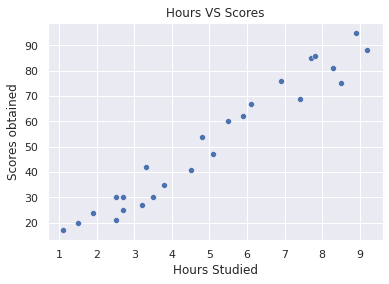

In [76]:
# We will plot distribution of scores
sns.scatterplot(data=data, x="Hours", y="Scores") 
plt.title("Hours VS Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Scores obtained")
plt.show()



**From the above graph we can clearly see that there is a positive linear relation between the numbers of hours studied and marks obtained**

**Preparing the data**

Now we will divide the data into attributes and labels.



In [77]:
x = data.iloc[:,:-1].values
y = data.iloc[:, 1].values

Now we will split data into training and testing sets

In [78]:
# We will split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [79]:
# We will print shape of x_train and x_test
print(x_train.shape)
print(x_test.shape)

(20, 1)
(5, 1)


**Training the data**

We have split our dataset into training and testing sets and now we will train our model.


In [80]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
# we will plot the regression line
line = lr.coef_*x+lr.intercept_

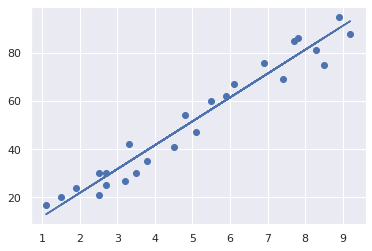

In [82]:
# we will plot for test data
plt.scatter(x,y)
plt.plot(x, line);
plt.show()



**Making Prediction**

As we have trained our model then now it's time to do some predictions



In [83]:
# we will predict scores
y_pred = lr.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [84]:
y_test

array([20, 27, 69, 30, 62])

In [85]:
# we will compare Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [86]:
# we will test for own data
hours = np.array([9.25])
pred = lr.predict(hours.reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred))


No of Hours = [9.25]
Predicted Score = [93.69173249]


**Evaluating the model**


The final step is to evalulate the performance of our model.This step is particularly important to compare how well our model perform on a particular data.






In [87]:
# we will calculate Mean Absolute error
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

Mean Absolute Error: 4.183859899002982
